In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pdp
import matplotlib as mpl
mpl.rcParams['font.size'] = 15.0
%matplotlib inline
import imp
plt.style.use('seaborn-darkgrid')
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBRFClassifier,XGBClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV, train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
from numpy.linalg import svd
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA, NMF
from os import listdir

In [108]:
import src.LC_Clean_Assist as LCC
import src.LC_Plotter as LCP
import src.LC_Transformer as LCT
import src.LC_Models as LCM
imp.reload(LCP)
imp.reload(LCC)
imp.reload(LCT)
imp.reload(LCM)

<module 'src.LC_Models' from '/Users/adamricks/Documents/Galvanize/Capstone2/lending-club/src/LC_Models.py'>

In [ ]:
df = pd.read_csv('data/LC_Compiled.csv',low_memory=False)
df = LCC.clean_lc_for_plotting(df)

In [ ]:
df = LCC.clean_lc_for_models(df)
df.to_csv('data/cleaned_data.csv',index=False)



In [4]:
df=pd.read_csv('data/cleaned_data.csv')


In [5]:
scaled_df = LCT.lc_transform(df)
rfc = RandomForestClassifier()
output_df = LCM.lc_mult_evaluate(scaled_df,rfc)

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Testing with proportion 0.01




/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



[[ 31004      0]
 [125989     14]]


accuracy: 0.19755807065926997
precision: 1.0
Return: 5.9
Testing with proportion 0.13458333333333333


[[ 30728    276]
 [119751   6252]]


accuracy: 0.23553089989618298
precision: 0.9577205882352942
Return: 6.5
Testing with proportion 0.25916666666666666


[[ 29917   1087]
 [108910  17093]]


accuracy: 0.29941340195023153
precision: 0.9402090209020902
Return: 6.7
Testing with proportion 0.38375000000000004


[[28661  2343]
 [97767 28236]]


accuracy: 0.36238511658715855
precision: 0.9233787893652506
Return: 6.6
Testing with proportion 0.5083333333333333


[[27281  3723]
 [87658 38345]]


accuracy: 0.41798136388823426
precision: 0.9115004278786726
Return: 6.7
Testing with proportion 0.6329166666666667


[[25772  5232]
 [78632 47371]]


accuracy: 0.46585821014349676
precision: 0.9005379921297264
Return: 6.7
Testing with proportion 0.7575000000000001


[[24351  6653]
 [71033 54970]]


accuracy: 0.5052067742202577
precision: 0.8920370640832157
Return: 

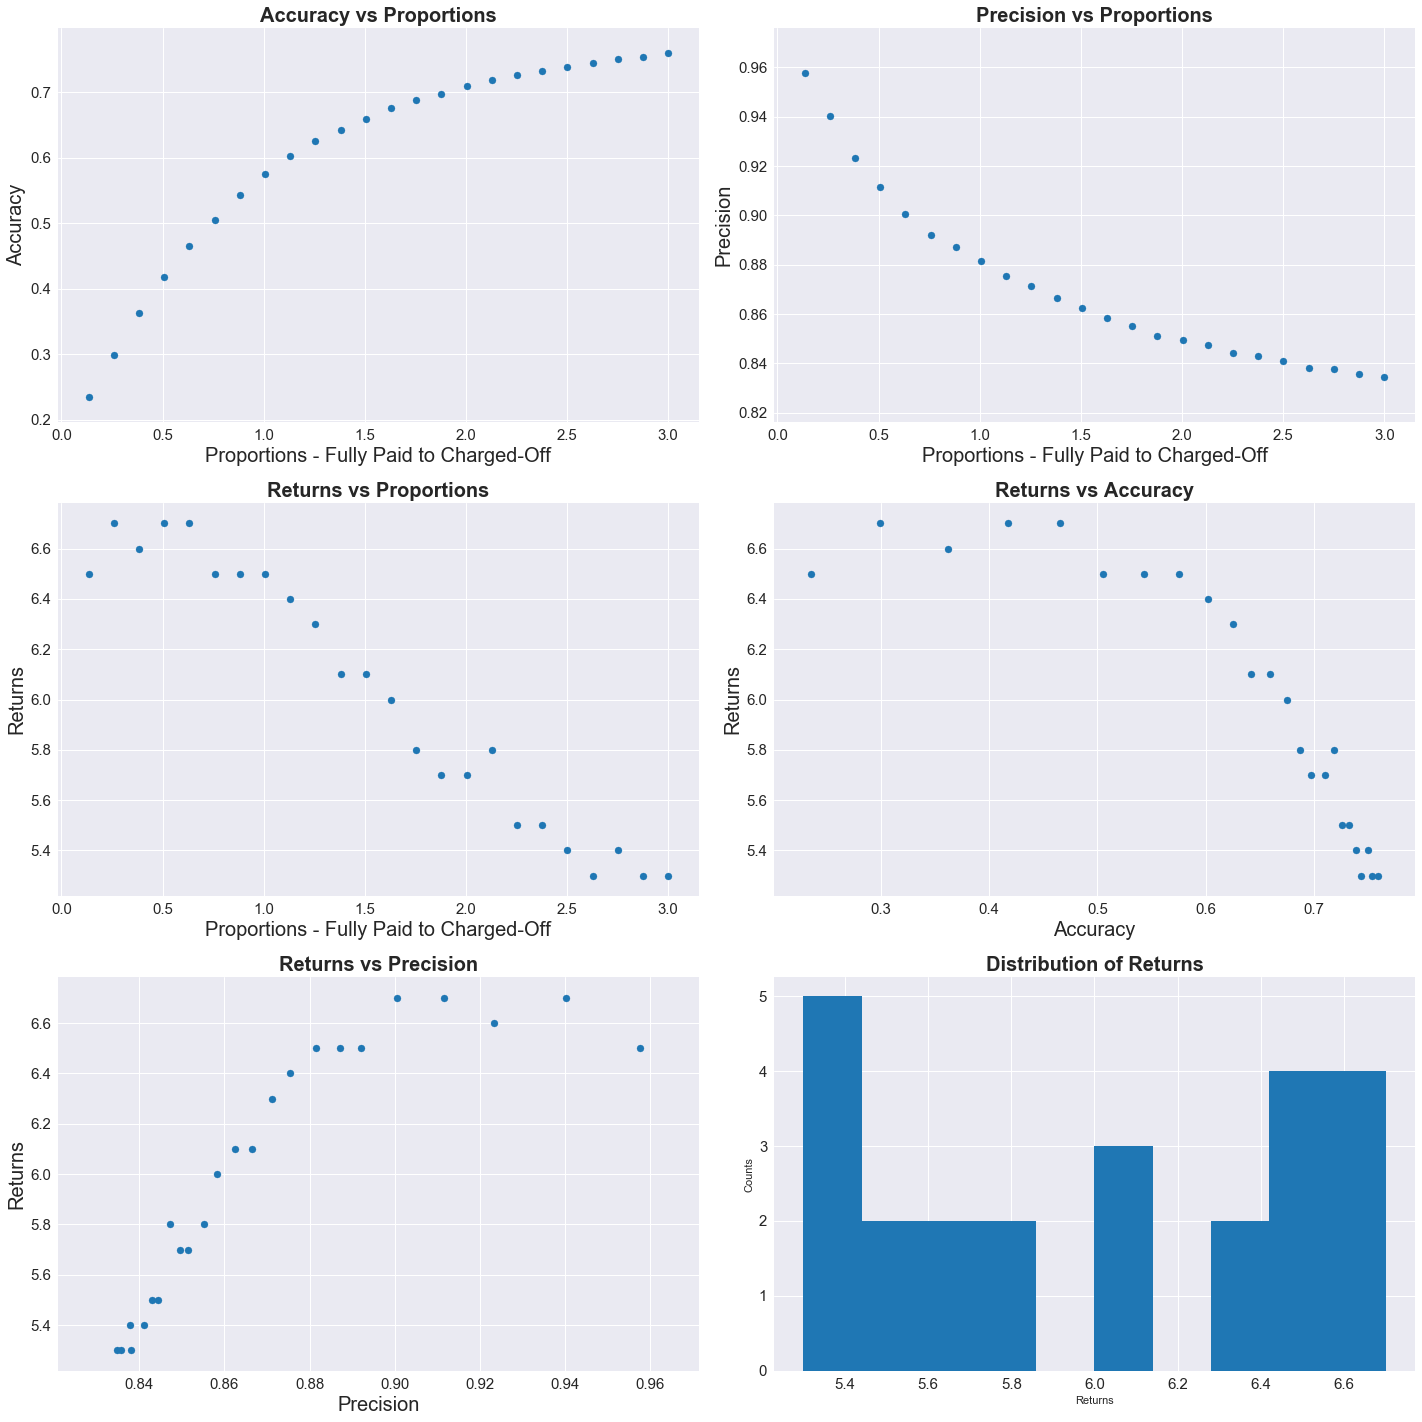

In [6]:
LCP.lc_choose_proportion(output_df)

In [7]:
X_train, X_test, y_train, y_test, train_loan_data, test_loan_data = LCT.lc_balance_sets(scaled_df,0.5)

In [8]:
LCP.lc_defaults_iplot(X_train,y_train,X_test,y_test,test_loan_data)

Logistic Regression
[[28039  2965]
 [86673 39330]]


accuracy: 0.42908277974867365
precision: 0.9298971509634708
Return: 6.6


Random Forest
[[27342  3662]
 [88580 37423]]


accuracy: 0.41249753195717387
precision: 0.9108677132773518
Return: 6.6


Gradient Boosting
[[28199  2805]
 [86548 39455]]


accuracy: 0.43089798544013963
precision: 0.9336251774727875
Return: 6.4


XGradient Boosting
[[28216  2788]
 [86762 39241]]


accuracy: 0.4296432643130561
precision: 0.9336648504603964
Return: 6.5


/anaconda3/lib/python3.7/site-packages/plotly/offline/offline.py:562: UserWarning:

Your filename `default_ml_models` didn't end with .html. Adding .html to the end of your file.



In [ ]:
# Tuning a logistic regression model
penalty = ['l1','l2']
C = np.arange(1,10,1)
logm = LogisticRegression(solver = 'liblinear')
logm_grid = GridSearchCV(logm,dict(penalty=penalty,C=C),cv=3,scoring='precision')
logm_grid.fit(X_train,y_train)


In [ ]:
logm_grid.best_params_

In [ ]:
y_preds = logm_grid.best_estimator_.predict(X_test)
log_acc,log_prec,log_ret = LCM.lc_score(y_test,y_preds,test_loan_data)

In [ ]:
log_acc = round(log_acc,2)
log_prec = round(log_prec,2)
log_ret = round((log_ret / 100) + 1,3)

In [ ]:
params = {
 'min_samples_leaf': [15],
 'n_estimators': [110,115,120]}
rfc = RandomForestClassifier(max_depth=10,max_features='sqrt')
clf = GridSearchCV(rfc,params,scoring='precision',cv=3)
clf.fit(X_train,y_train)

In [ ]:
clf.best_params_

In [ ]:
y_preds = clf.best_estimator_.predict(X_test)
rfc_acc,rfc_prec,rfc_ret = LCM.lc_score(y_test,y_preds,test_loan_data)

In [ ]:
rfc_acc = round(rfc_acc,2)
rfc_prec = round(rfc_acc,2)
rfc_ret = round((rfc_ret/100)+1,3)

In [ ]:
params = {'n_estimators':[10,50],'learning_rate':[0.1],'max_depth':[3,6]}
gbc = GradientBoostingClassifier()
gbc_grid = GridSearchCV(gbc,params,scoring='precision',cv=3)
gbc_grid.fit(X_train,y_train)

In [ ]:
gbc_grid.best_params_

In [ ]:
y_preds = gbc_grid.predict(X_test)
gbc_acc, gbc_prec, gbc_ret = LCM.lc_score(y_test,y_preds,test_loan_data)

In [ ]:
gbc_acc = round(gbc_acc,2)
gbc_prec = round(gbc_prec,2)
gbc_ret = round((gbc_ret / 100) + 1,3)

In [ ]:
params = {'reg_alpha':[0.1,0.5,1]}
xgb = XGBClassifier(n_estimators=9,learning_rate=0.01,max_depth=2,)
xgb_grid = GridSearchCV(xgb,params,cv=3)
xgb_grid.fit(X_train,y_train)

In [ ]:
xgb_grid.best_params_

In [ ]:
y_preds = xgb_grid.predict(X_test)
xgb_acc , xgb_prec, xgb_ret = LCM.lc_score(y_test,y_preds,test_loan_data)

In [ ]:
xgb_acc = round(xgb_acc,2)
xgb_prec = round(xgb_prec,2)
xgb_ret = round((xgb_ret/100)+1,3)

In [16]:
test_params = {
 'max_depth': [3,5,10,15,20],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4,6,10],
 'min_samples_split': [2, 5, 7,10],
 'n_estimators': [10,20,100]}

In [17]:
rfc_r = RandomForestClassifier()

In [18]:
test_random = RandomizedSearchCV(rfc_r,param_distributions=test_params,cv=3,n_iter=3,n_jobs=-1)

In [19]:
test_random.fit(X_train,y_train)

/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [20]:
LCM.lc_score(y_test,test_random.predict(X_test),test_loan_data)

[[28681  2323]
 [91931 34072]]


accuracy: 0.39968281668970174
precision: 0.9361725511746118
Return: 6.0


(0.39968281668970174, 0.9361725511746118, 6.0)

In [21]:
test_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 10}

In [33]:
logm_stats, rfc_stats, gbc_stats, xgb_stats, logm_random, rfc_random, gbc_random, xgb_random = LCM.lc_randomized_search(X_train,y_train,X_test, y_test,test_loan_data,'accuracy')

Completed fit for Logistic Regression
Completed fit for Random Forest
Completed fit for Gradient Boosting


/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



Completed fit for XGradient Boosting
Logistic Regression
Best_Params: {'penalty': 'l1', 'C': 7}
[[28039  2965]
 [86668 39335]]


accuracy: 0.429114625462559
precision: 0.9299054373522458
Return: 6.6


Random Forest
Best Params: {'n_estimators': 20, 'min_samples_split': 5, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'max_depth': 15}
[[28262  2742]
 [87864 38139]]


accuracy: 0.42291744954046634
precision: 0.9329272767300213
Return: 6.5


Gradient Boosting
Best Params: {'n_estimators': 50, 'max_depth': 6, 'learning_rate': 0.1}
[[28076  2928]
 [85173 40830]]


accuracy: 0.4388721521970358
precision: 0.9330865213218155
Return: 6.8


XGradientBoosting
Best Params: {'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.1}
[[28534  2470]
 [90473 35530]]


accuracy: 0.40803276287044526
precision: 0.935
Return: 6.0


In [34]:
logm_stats_p, rfc_stats_p, gbc_stats_p, xgb_stats_p, logm_random_p, rfc_random_p, gbc_random_p, xgb_random_p = LCM.lc_randomized_search(X_train,y_train,X_test, y_test,test_loan_data,'precision')

Completed fit for Logistic Regression
Completed fit for Random Forest
Completed fit for Gradient Boosting


/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



Completed fit for XGradient Boosting
Logistic Regression
Best_Params: {'penalty': 'l2', 'C': 1}
[[28039  2965]
 [86673 39330]]


accuracy: 0.42908277974867365
precision: 0.9298971509634708
Return: 6.6


Random Forest
Best Params: {'n_estimators': 20, 'min_samples_split': 7, 'min_samples_leaf': 10, 'max_features': 'auto', 'max_depth': 3}
[[ 29955   1049]
 [107259  18744]]


accuracy: 0.31017088410070887
precision: 0.947001465164452
Return: 5.3


Gradient Boosting
Best Params: {'n_estimators': 50, 'max_depth': 6, 'learning_rate': 0.01}
[[ 30871    133]
 [121069   4934]]


accuracy: 0.22804715713312146
precision: 0.9737517268600749
Return: 5.1


XGradientBoosting
Best Params: {'n_estimators': 10, 'max_depth': 3, 'learning_rate': 0.01}
[[29270  1734]
 [99643 26360]]


accuracy: 0.3543154126886062
precision: 0.9382786360076885
Return: 5.2


In [45]:
LCP.lc_ml(logm_stats,rfc_stats, gbc_stats,xgb_stats,'images/r_grid_acc','Randomized Grid Search / Scoring: Accuracy')

/anaconda3/lib/python3.7/site-packages/plotly/offline/offline.py:562: UserWarning:

Your filename `random_ml_models` didn't end with .html. Adding .html to the end of your file.



In [101]:
LCP.lc_ml(logm_stats_p,rfc_stats_p, gbc_stats_p,xgb_stats_p,'images/r_grid_prec','Randomized Grid Search / Scoring: Precision')

/anaconda3/lib/python3.7/site-packages/plotly/offline/offline.py:562: UserWarning:

Your filename `random_ml_models` didn't end with .html. Adding .html to the end of your file.



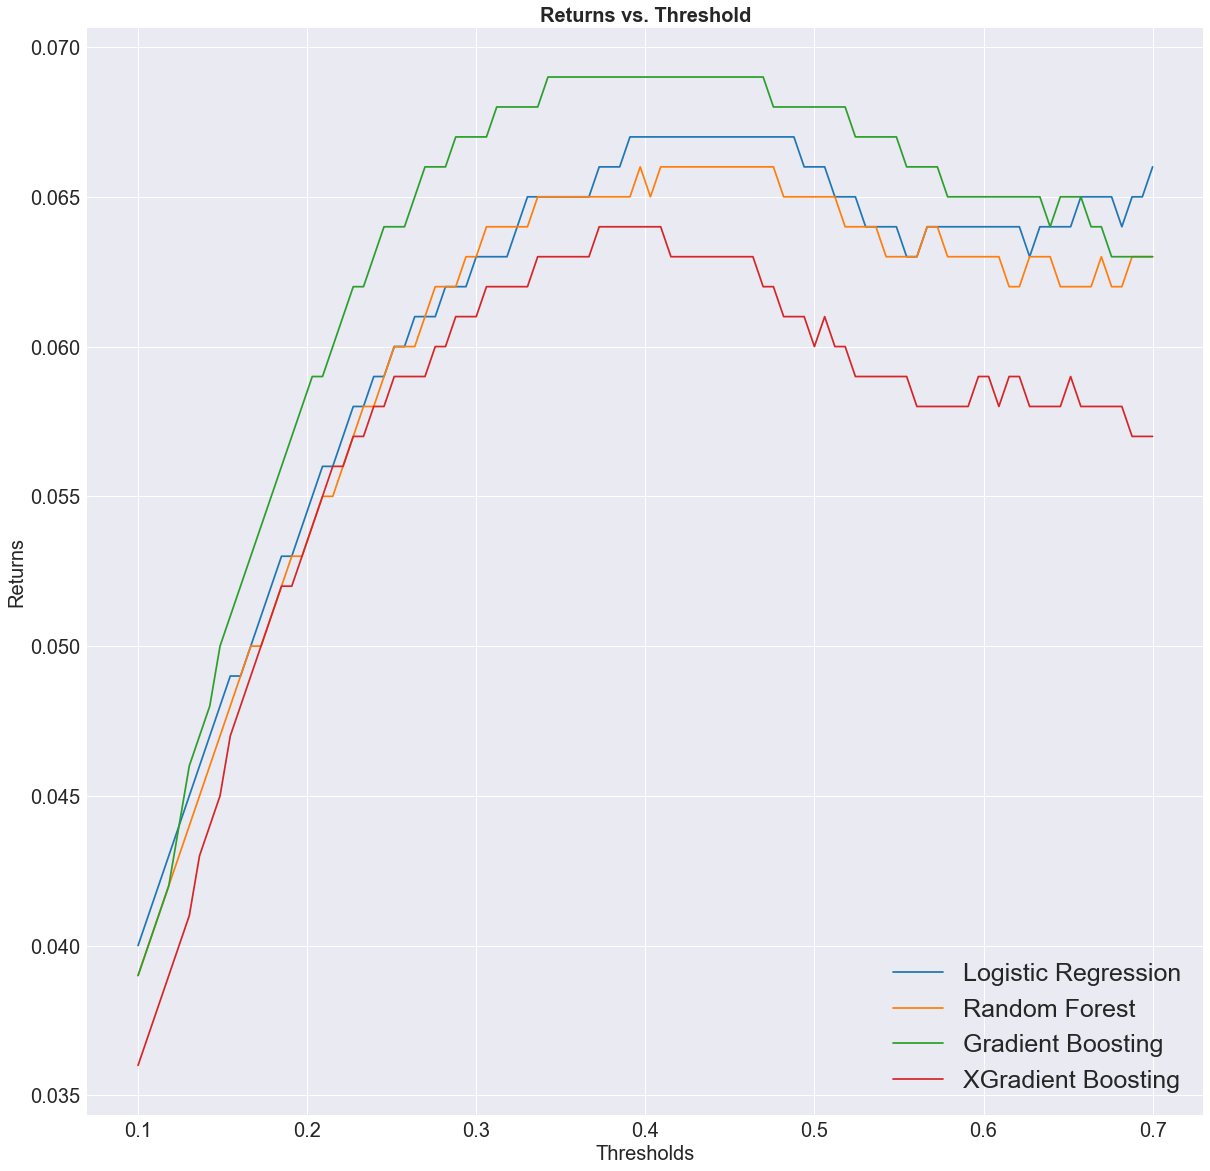

In [109]:
models = [logm_random, rfc_random, gbc_random, xgb_random]
LCP.lc_returns_vs_thresholds(models,X_test,y_test,test_loan_data)

In [105]:
x,y = LCM.lc_predict_probas_evaluator(gbc_random,X_test,y_test,test_loan_data)